In [453]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [417]:
train = pd.read_csv('space/train.csv')
test = pd.read_csv('space/test.csv')

In [418]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [419]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [420]:
data = pd.concat([train, test])

In [421]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [380]:
train.shape, test.shape, data.shape

((8693, 14), (4277, 13), (12970, 14))

In [381]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [382]:
data.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,12970,12682,12660,12671,12696,12674,12676,8693
unique,12970,3,2,9825,3,2,12629,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Carry Contrevins,True
freq,1,6865,8079,8,8871,12401,2,4378


C:\Users\profg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transported', ylabel='count'>

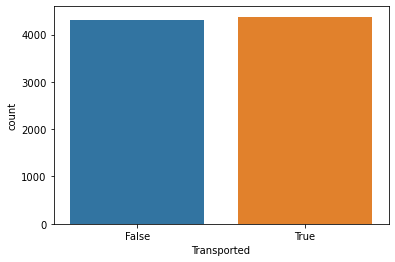

In [383]:
sns.countplot(data['Transported'])

In [422]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [423]:
data.columns = ['Id','PlanetaNatal', 'Criogenia', 'Cabine', 'Destino', 'Idade', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Nome',
       'Transportado']

In [424]:
data['PlanetaNatal'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [425]:
data['PlanetaNatal'] = data['PlanetaNatal'].map({'Europa':'Europa','Earth':'Terra','Mars':'Marte','nan':None})

In [426]:
data['Transportado'] = data['Transportado'].map({True: 1, False: 0})

In [427]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            12970 non-null  object 
 1   PlanetaNatal  12682 non-null  object 
 2   Criogenia     12660 non-null  object 
 3   Cabine        12671 non-null  object 
 4   Destino       12696 non-null  object 
 5   Idade         12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Nome          12676 non-null  object 
 13  Transportado  8693 non-null   float64
dtypes: float64(7), object(7)
memory usage: 1.5+ MB


In [390]:
data.dtypes

Id               object
PlanetaNatal     object
Criogenia        object
Cabine           object
Destino          object
Idade           float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Nome             object
Transportado    float64
dtype: object

In [391]:
print('Dados Faltantes:')
for i in data.columns:
    print(f'- {i}:', data[i].isnull().sum())

Dados Faltantes:
- Id: 0
- PlanetaNatal: 288
- Criogenia: 310
- Cabine: 299
- Destino: 274
- Idade: 270
- VIP: 296
- RoomService: 263
- FoodCourt: 289
- ShoppingMall: 306
- Spa: 284
- VRDeck: 268
- Nome: 294
- Transportado: 4277


In [392]:
print('Porcentagem de Dados Faltantes:')
for i in data.columns:
    pct = round(data[i].isnull().sum()/len(data),4)
    print(f'- {i}:',pct,'%')

Porcentagem de Dados Faltantes:
- Id: 0.0 %
- PlanetaNatal: 0.0222 %
- Criogenia: 0.0239 %
- Cabine: 0.0231 %
- Destino: 0.0211 %
- Idade: 0.0208 %
- VIP: 0.0228 %
- RoomService: 0.0203 %
- FoodCourt: 0.0223 %
- ShoppingMall: 0.0236 %
- Spa: 0.0219 %
- VRDeck: 0.0207 %
- Nome: 0.0227 %
- Transportado: 0.3298 %


In [393]:
print('Variáveis Categóricas:')
for i in data.select_dtypes(include=['object']).columns:
    print('-',i)

Variáveis Categóricas:
- Id
- PlanetaNatal
- Criogenia
- Cabine
- Destino
- VIP
- Nome


In [428]:
data['PlanetaNatal'] = data['PlanetaNatal'].fillna(data['PlanetaNatal'].mode()[0])
data['Destino'] = data['Destino'].fillna(data['Destino'].mode()[0])
data['VIP'] = data['VIP'].fillna(data['VIP'].mode()[0])
data['Criogenia'] = data['Criogenia'].fillna(data['Criogenia'].mode()[0])
data['Cabine'] = data['Cabine'].fillna(data['Cabine'].mode()[0])

In [395]:
print('Variáveis Numéricas:')
for i in data._get_numeric_data().columns:
    print('-',i)

Variáveis Numéricas:
- Criogenia
- Idade
- VIP
- RoomService
- FoodCourt
- ShoppingMall
- Spa
- VRDeck
- Transportado


In [429]:
data['Idade'] = data['Idade'].fillna(data['Idade'].mean())
data['RoomService'] = data['RoomService'].fillna(data['RoomService'].mean())
data['FoodCourt'] = data['FoodCourt'].fillna(data['FoodCourt'].mean())
data['ShoppingMall'] = data['ShoppingMall'].fillna(data['ShoppingMall'].mean())
data['Spa'] = data['Spa'].fillna(data['Spa'].mean())
data['VRDeck'] = data['VRDeck'].fillna(data['VRDeck'].mean())

In [397]:
data.isnull().sum()

Id                 0
PlanetaNatal       0
Criogenia          0
Cabine             0
Destino            0
Idade              0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Nome             294
Transportado    4277
dtype: int64

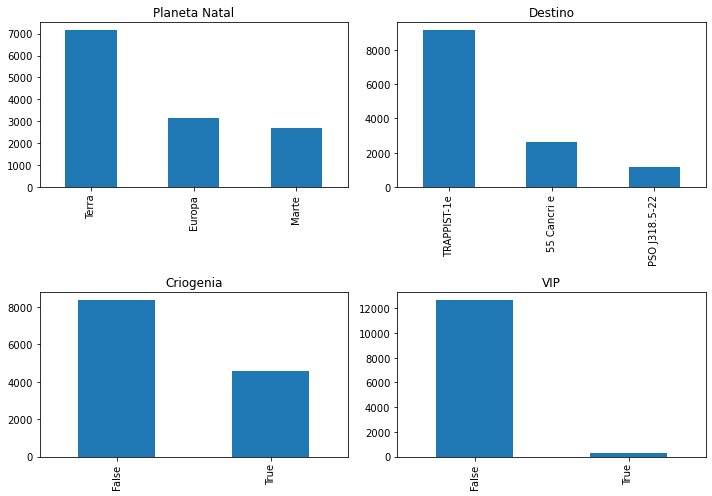

In [398]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
data['PlanetaNatal'].value_counts().plot(kind='bar', title='Planeta Natal')
plt.subplot(2,2,2)
data['Destino'].value_counts().plot(kind='bar', title='Destino')
plt.subplot(2,2,3)
data['Criogenia'].value_counts().plot(kind='bar', title='Criogenia')
plt.subplot(2,2,4)
data['VIP'].value_counts().plot(kind='bar', title='VIP')
plt.tight_layout()

In [430]:
data['Cabine']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
4272    G/1496/S
4273     G/160/P
4274     D/296/P
4275     D/297/P
4276    G/1498/S
Name: Cabine, Length: 12970, dtype: object

In [431]:
data['Deck'] = data['Cabine'].apply(lambda x: x[0] if pd.notnull(x) else 'M')
data['Porto'] = data['Cabine'].apply(lambda x: x[-1] if pd.notnull(x) else 'M')

In [433]:
data

,Id,PlanetaNatal,Criogenia,Cabine,Destino,Idade,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Nome,Transportado,Deck,Porto
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,B,P
1,0002_01,Terra,False,F/0/S,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.000000,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,A,S
4,0004_01,Terra,False,F/1/S,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Terra,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,S
4273,9269_01,Terra,False,G/160/P,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,G,P
4274,9271_01,Marte,True,D/296/P,55 Cancri e,28.771969,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,D,P
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,28.771969,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,D,P


In [402]:
data['Deck']

0       B
1       F
2       A
3       A
4       F
       ..
4272    G
4273    G
4274    D
4275    D
4276    G
Name: Deck, Length: 12970, dtype: object

In [403]:
data['Porto']

0       P
1       S
2       S
3       S
4       S
       ..
4272    S
4273    P
4274    P
4275    P
4276    S
Name: Porto, Length: 12970, dtype: object

In [434]:
data['Deck'] = data['Deck'].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7})
data['Porto'] = data['Porto'].map({'P':0,'S':1})

In [435]:
data = data.drop(['Cabine'], axis=1)

In [436]:
data['PlanetaNatal'] = data['PlanetaNatal'].map({'Europa':0, 'Terra':1, 'Marte':2})

In [437]:
data['Destino'] = data['Destino'].map({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})

In [438]:
data['VIP'] = data['VIP'].map({False: 0, True: 1})
data['Criogenia'] = data['Criogenia'].map({False: 0, True: 1})

In [439]:
data = data.drop(['Nome'], axis=1)

In [440]:
data.shape

(12970, 14)

In [441]:
data.isnull().sum()

Id                 0
PlanetaNatal       0
Criogenia          0
Destino            0
Idade              0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transportado    4277
Deck               0
Porto              0
dtype: int64

In [442]:
data

,Id,PlanetaNatal,Criogenia,Destino,Idade,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transportado,Deck,Porto
0,0001_01,0,0,0,39.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0002_01,1,0,0,24.000000,0,109.0,9.0,25.0,549.0,44.0,1.0,1,1
2,0003_01,0,0,0,58.000000,1,43.0,3576.0,0.0,6715.0,49.0,0.0,2,1
3,0003_02,0,0,0,33.000000,0,0.0,1283.0,371.0,3329.0,193.0,0.0,2,1
4,0004_01,1,0,0,16.000000,0,303.0,70.0,151.0,565.0,2.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,0,34.000000,0,0.0,0.0,0.0,0.0,0.0,NaN,3,1
4273,9269_01,1,0,0,42.000000,0,0.0,847.0,17.0,10.0,144.0,NaN,3,0
4274,9271_01,2,1,2,28.771969,0,0.0,0.0,0.0,0.0,0.0,NaN,5,0
4275,9273_01,0,0,0,28.771969,0,0.0,2680.0,0.0,0.0,523.0,NaN,5,0


In [450]:
data.to_csv('dados_limpos.csv')

In [448]:
train = data[(data['Transportado']==1)|(data['Transportado']==0)]
train

,Id,PlanetaNatal,Criogenia,Destino,Idade,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transportado,Deck,Porto
0,0001_01,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0002_01,1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1.0,1,1
2,0003_01,0,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0.0,2,1
3,0003_02,0,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0.0,2,1
4,0004_01,1,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,0,2,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0.0,2,0
8689,9278_01,1,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,1
8690,9279_01,1,0,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1.0,3,1
8691,9280_01,0,0,2,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0.0,4,1


In [446]:
test = data[(data['Transportado']!=1)&(data['Transportado']!=0)]
test

,Id,PlanetaNatal,Criogenia,Destino,Idade,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transportado,Deck,Porto
0,0013_01,1,1,0,27.000000,0,0.0,0.0,0.0,0.0,0.0,NaN,3,1
1,0018_01,1,0,0,19.000000,0,0.0,9.0,0.0,2823.0,0.0,NaN,1,1
2,0019_01,0,1,2,31.000000,0,0.0,0.0,0.0,0.0,0.0,NaN,6,1
3,0021_01,0,0,0,38.000000,0,0.0,6652.0,0.0,181.0,585.0,NaN,6,1
4,0023_01,1,0,0,20.000000,0,10.0,0.0,635.0,0.0,0.0,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,0,34.000000,0,0.0,0.0,0.0,0.0,0.0,NaN,3,1
4273,9269_01,1,0,0,42.000000,0,0.0,847.0,17.0,10.0,144.0,NaN,3,0
4274,9271_01,2,1,2,28.771969,0,0.0,0.0,0.0,0.0,0.0,NaN,5,0
4275,9273_01,0,0,0,28.771969,0,0.0,2680.0,0.0,0.0,523.0,NaN,5,0


In [449]:
test.drop('Transportado', axis=1, inplace=True)
test

C:\Users\profg\AppData\Local\Temp\ipykernel_19236\3224977696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Transportado', axis=1, inplace=True)


,Id,PlanetaNatal,Criogenia,Destino,Idade,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Porto
0,0013_01,1,1,0,27.000000,0,0.0,0.0,0.0,0.0,0.0,3,1
1,0018_01,1,0,0,19.000000,0,0.0,9.0,0.0,2823.0,0.0,1,1
2,0019_01,0,1,2,31.000000,0,0.0,0.0,0.0,0.0,0.0,6,1
3,0021_01,0,0,0,38.000000,0,0.0,6652.0,0.0,181.0,585.0,6,1
4,0023_01,1,0,0,20.000000,0,10.0,0.0,635.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,0,34.000000,0,0.0,0.0,0.0,0.0,0.0,3,1
4273,9269_01,1,0,0,42.000000,0,0.0,847.0,17.0,10.0,144.0,3,0
4274,9271_01,2,1,2,28.771969,0,0.0,0.0,0.0,0.0,0.0,5,0
4275,9273_01,0,0,0,28.771969,0,0.0,2680.0,0.0,0.0,523.0,5,0


In [503]:
train.to_csv('train_limpo.csv')
test.to_csv('test_limpo.csv')

In [451]:
X = train.drop('Transportado', axis=1)
y = train['Transportado']

In [452]:
X.shape, y.shape

((8693, 13), (8693,))

In [530]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [531]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6085, 13), (6085,), (2608, 13), (2608,))

In [516]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg_score = lg.score(X_test, y_test)

In [517]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)

In [518]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)

In [519]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_score = sgd.score(X_test, y_test)

In [540]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_score = gb.score(X_test, y_test)

In [521]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)

In [522]:
svc = SVC()
svc.fit(X_train, y_train)
svc_score = svc.score(X_test, y_test)

In [523]:
perc = Perceptron()
perc.fit(X_train, y_train)
perc_score = perc.score(X_test, y_test)

In [524]:
print('Score:')
print(f'- lg: {lg_score}')
print(f'- rf: {rf_score}')
print(f'- dt: {dt_score}')
print(f'- sgd: {sgd_score}')
print(f'- gb: {gb_score}')
print(f'- knn: {knn_score}')
print(f'- svc: {svc_score}')
print(f'- perceptron: {perc_score}')

Score:
- lg: 0.781441717791411
- rf: 0.8067484662576687
- dt: 0.7488496932515337
- sgd: 0.5993098159509203
- gb: 0.8182515337423313
- knn: 0.6008435582822086
- svc: 0.5460122699386503
- perceptron: 0.49808282208588955


In [548]:
pred = gb.predict(test)
pred.shape

(4277,)

In [549]:
df_test = pd.read_csv('test_limpo.csv')

In [556]:
df_final = pd.DataFrame({'PassengerId':test['Id'], 'Transported':pred})
df_final

,PassengerId,Transported
0,0013_01,1.0
1,0018_01,0.0
2,0019_01,1.0
3,0021_01,1.0
4,0023_01,1.0
...,...,...
4272,9266_02,1.0
4273,9269_01,0.0
4274,9271_01,1.0
4275,9273_01,1.0


In [557]:
df_final['Transported'] = df_final['Transported'].map({1: True, 0: False})

In [558]:
df_final

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [560]:
df_final.to_csv('spaceship.csv', index=False)